#### This code generates large dataframe containing multiple timeseries

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

#### parameters to set

In [58]:
n_series = 6
n_timesteps = 8*24*3600 # 8 days

# regular behaviour
max_noise_amplitude = 0.05 # all the timeseries will have values between 0 and 1

# anomalies
p_anomaly = 10E-6
max_anomaly_duration = 4*3600 # 4 h

#### generate normal data

In [59]:
df = pd.DataFrame()
for s in range(n_series):
    v = np.random.normal(random.random()/2, max_noise_amplitude/random.randint(1, 8), n_timesteps) 
    df[s]=pd.Series(v)
df['Flag']=False
#df.head()

#### generate anomalies

In [60]:
to_generate = int(n_timesteps * p_anomaly)
for a in range(to_generate):
    affects = random.sample(range(n_series), random.randint(1, n_series))
    duration = int(max_anomaly_duration * random.random())
    start = (n_timesteps * random.random())
    end = min(start+duration, n_timesteps)
    for s in affects:
        df.loc[start:end,s] = df.loc[start:end,s] + random.random() * 0.3
    if len(affects)>1:
        df.loc[start:end,"Flag"]=True
        

#### enforce range

In [61]:
df[df<0] = 0
df[df>1] = 1

#### plot timeseries

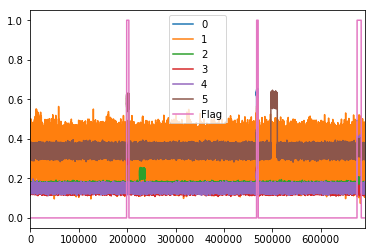

In [62]:
df.plot()

#### running BDT

In [63]:
clf = AdaBoostClassifier(n_estimators=100)
y=df.Flag
X=df.loc[:,range(n_series)]
# scores = cross_val_score(clf, X, y)
# print(scores)

#### Analysis

learn AdaBoost over 70% of data

In [64]:
trainingSetSize=int(X.shape[0] *.7)
X_train = X.iloc[:trainingSetSize].values
X_test = X.iloc[trainingSetSize:].values
y_train = y.iloc[:trainingSetSize].values
y_test = y.iloc[trainingSetSize:].values

Predict for rest of data

In [65]:
from sklearn.metrics import roc_curve, auc

In [66]:
def Adaboost(X_Train,X_Test,y_Train, y_Test):
    clf = AdaBoostClassifier(n_estimators=100)
    #creates a boosted decision tree
    #scores = cross_val_score(clf, iris.data, iris.target)
    #scores.mean()  
    clf.fit(X_Train,y_Train)
    #trains the model
    
    fpr, tpr, _ = roc_curve(y_Test, clf.predict(X_Test))
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return clf

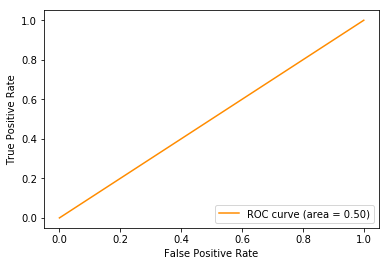

In [67]:
clf=Adaboost(X_train, X_test, y_train, y_test)
# This roc curve seems to indicate the trained model is not much better than a random algorithm

In [72]:
# clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train)
flags_predict = clf.predict(X_test)
for index, flag in np.ndenumerate(flags_predict):
    if y_test[index] != flag:
        print ("anomaly row number: ", index, "predicted value: ", flag, "anomaly actual value: ", y_test[index])

('anomaly row number: ', (190835,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190836,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190837,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190838,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190839,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190840,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190841,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190842,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190843,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190844,), 'predicted value: ', False, 'anomaly actual value: ', True)
('anomaly row number: ', (190845,), 'pre